In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_style({'font.family':'sans-serif', 'font.serif':['Helvetica Neue'], 
                'axes.axisbelow': True, 'axes.facecolor': '#F2F2F2', 'axes.grid': False, 'grid.color': 'grey', 
               'grid.linestyle': '--', 'xtick.color': '.10', 'ytick.color': '.10', 'axes.labelcolor': '.10', 'axes.linewidth': 0.1})

# Cause plots to be displayed in the notebook:#F2F2F2
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('D:/OneDrive/Learning/Data Science/Python/Institute of Data/IOD_Coursework/Mini Project 01/Data Files/Vic_crash_person.csv')

In [3]:
df.head()

,accident_no,sex,age,age_group,seating_position,road_user,age_driver,gender_driver,g_a_driver,sev_no
0,T20150000004,M,32,31-45,P,Pedestrians,0,0,0,3
1,T20150000004,M,31,31-45,D,Drivers,Younger Driver,Male Driver,ymd,3
2,T20150000005,F,80,75+,FS,Passengers,0,0,0,2
3,T20150000005,F,73,61-75,D,Drivers,Older Driver,Female Driver,ofd,2
4,T20150000008,M,35,31-45,D,Motorcyclists,Younger Driver,Male Driver,0,1


In [4]:
df.sev_no.value_counts()

3    128804
2     52149
1      3330
4         4
Name: sev_no, dtype: int64

In [5]:
df.dtypes

accident_no         object
sex                 object
age                  int64
age_group           object
seating_position    object
road_user           object
age_driver          object
gender_driver       object
g_a_driver          object
sev_no               int64
dtype: object

In [19]:
df_m = df.loc[df.sex == 'M']
df_f = df.loc[df.sex == 'F']

In [20]:
df_m.head()

,accident_no,sex,age,age_group,seating_position,road_user,age_driver,gender_driver,g_a_driver,sev_no
0,T20150000004,M,32,31-45,P,Pedestrians,0,0,0,3
1,T20150000004,M,31,31-45,D,Drivers,Younger Driver,Male Driver,ymd,3
4,T20150000008,M,35,31-45,D,Motorcyclists,Younger Driver,Male Driver,0,1
5,T20150000008,M,35,31-45,D,Motorcyclists,Younger Driver,Male Driver,0,1
6,T20150000011,M,48,46-60,D,Drivers,Older Driver,Male Driver,omd,2


In [34]:
df_f.head()

,accident_no,sex,age,age_group,seating_position,road_user,age_driver,gender_driver,g_a_driver,sev_no
2,T20150000005,F,80,75+,FS,Passengers,0,0,0,2
3,T20150000005,F,73,61-75,D,Drivers,Older Driver,Female Driver,ofd,2
7,T20150000014,F,27,16-30,D,Drivers,Younger Driver,Female Driver,yfd,3
12,T20150000028,F,54,46-60,D,Drivers,Older Driver,Female Driver,ofd,3
13,T20150000028,F,31,31-45,D,Drivers,Younger Driver,Female Driver,yfd,3


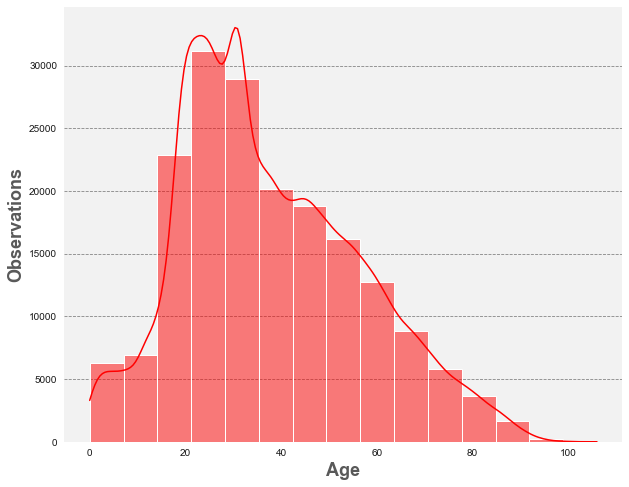

In [22]:
plt.figure(figsize=(10,8))
hist_age = sns.histplot(df.age, bins=15, color='red', kde=True)
sns.despine(left=True, bottom=True)

hist_age.set_xlabel('Age',fontsize = 18, fontweight='bold', color='#595959')
hist_age.set_ylabel('Observations',fontsize = 18, fontweight='bold', color='#595959')
hist_age.grid(axis='y')

plt.savefig('D:/OneDrive/Learning/Data Science/Python/Institute of Data/IOD_Coursework/Mini Project 01/Images/age_hist.png')
plt.show()

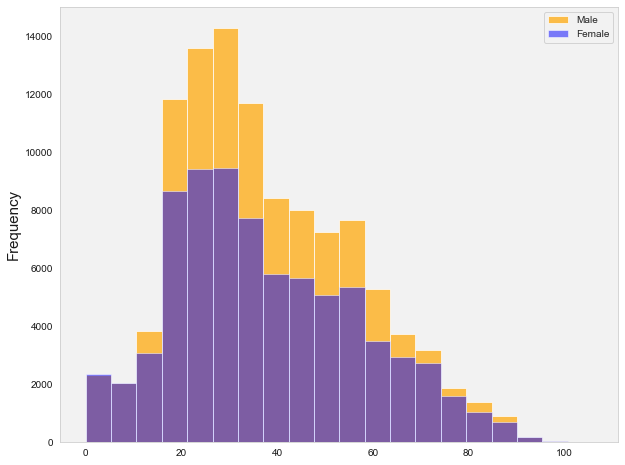

In [53]:
plt.figure(figsize=(10,8))
plt.hist(df_m.age, alpha=0.7, bins=20, color='orange', label='Male')
plt.hist(df_f.age, alpha=0.5, bins=20, color='blue', label='Female')

plt.ylabel('Frequency', fontsize=15)
plt.legend()

plt.savefig('D:/OneDrive/Learning/Data Science/Python/Institute of Data/IOD_Coursework/Mini Project 01/Images/m_f_age_all.png')
plt.show();

In [62]:
m_d = df_m.loc[df_m.seating_position == 'D']
f_d = df_f.loc[df_f.seating_position == 'D']

In [63]:
f_d.head()

,accident_no,sex,age,age_group,seating_position,road_user,age_driver,gender_driver,g_a_driver,sev_no
3,T20150000005,F,73,61-75,D,Drivers,Older Driver,Female Driver,ofd,2
7,T20150000014,F,27,16-30,D,Drivers,Younger Driver,Female Driver,yfd,3
12,T20150000028,F,54,46-60,D,Drivers,Older Driver,Female Driver,ofd,3
13,T20150000028,F,31,31-45,D,Drivers,Younger Driver,Female Driver,yfd,3
14,T20150000031,F,19,16-30,D,Drivers,Younger Driver,Female Driver,yfd,3


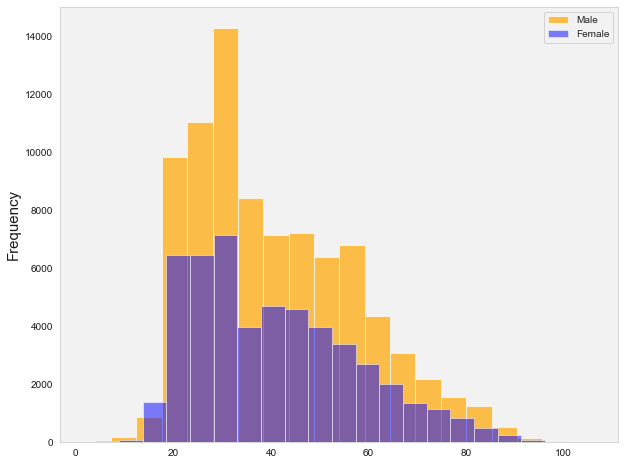

In [64]:
plt.figure(figsize=(10,8))
plt.hist(m_d.age, alpha=0.7, bins=20, color='orange', label='Male')
plt.hist(f_d.age, alpha=0.5, bins=20, color='blue', label='Female')

plt.ylabel('Frequency', fontsize=15)
plt.legend()

plt.savefig('D:/OneDrive/Learning/Data Science/Python/Institute of Data/IOD_Coursework/Mini Project 01/Images/m_f_age_drivers.png')
plt.show();

In [65]:
def bar_charts(df, feature):
    '''
    Inputs:
    df: Dataset
    feature: Name of Feature to Check With Survived
    '''

    _agg = {
        'accident_no': 'count'
    }
    _groupby = ['age_group', feature]

    df_feature = df.groupby(by=_groupby).agg(_agg)
    
    ax = df_feature.unstack().plot(kind='bar', figsize=(12,8))
    plt.legend(list(df_feature.index.levels[1].unique()))
    plt.xlabel('Age Group', fontsize=15)
    plt.xticks(np.arange(6), ('0-15', '16-30','31-45','46-60', '61-75', '75+'))
    plt.grid(axis='y')
    plt.show();

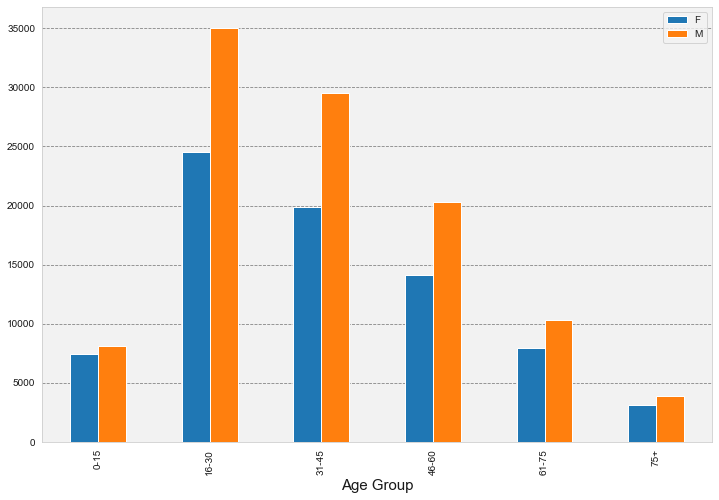

In [9]:
bar_charts(df, 'sex')

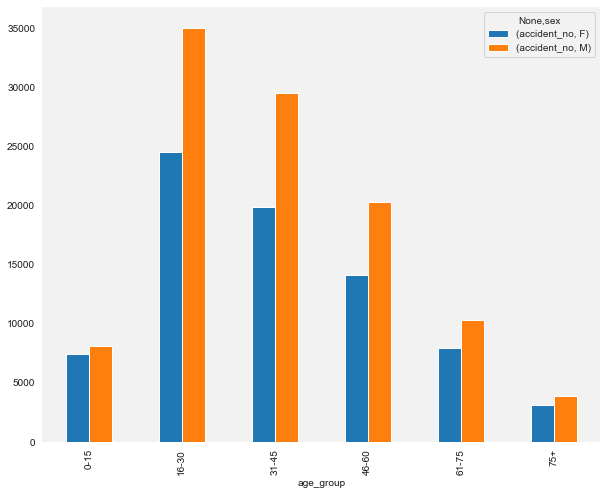

In [41]:
df.groupby(by=['age_group', 'sex']).agg({'accident_no': 'count'}).unstack().plot(kind='bar', figsize=(10,8))
sns.despine(left=True, bottom=True)
hist_age.grid(axis='y')

plt.savefig('D:/OneDrive/Learning/Data Science/Python/Institute of Data/IOD_Coursework/Mini Project 01/Images/age_group.png')
plt.show();

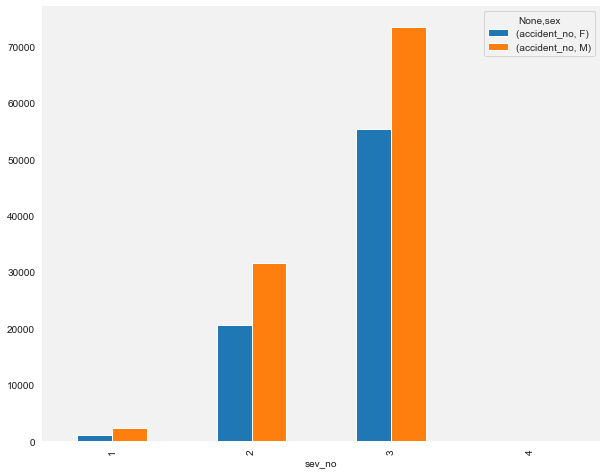

In [42]:
df.groupby(by=['sev_no', 'sex']).agg({'accident_no': 'count'}).unstack().plot(kind='bar', figsize=(10,8))
sns.despine(left=True, bottom=True)
hist_age.grid(axis='y')

plt.savefig('D:/OneDrive/Learning/Data Science/Python/Institute of Data/IOD_Coursework/Mini Project 01/Images/gen_sev.png')
plt.show();

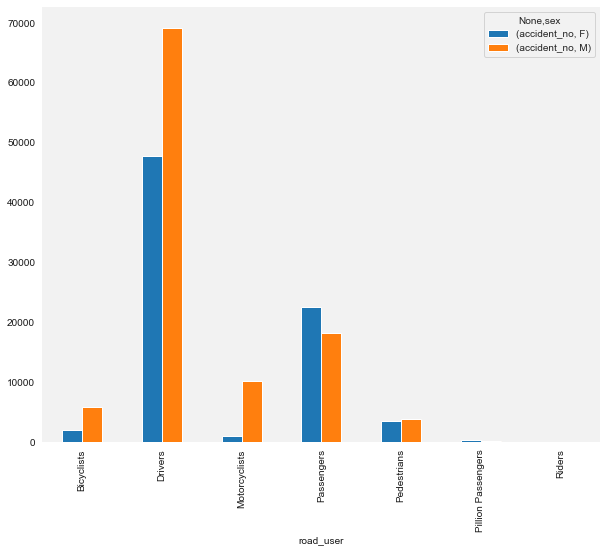

In [54]:
df.groupby(by=['road_user', 'sex']).agg({'accident_no': 'count'}).unstack().plot(kind='bar', figsize=(10,8))
sns.despine(left=True, bottom=True)
hist_age.grid(axis='y')

plt.savefig('D:/OneDrive/Learning/Data Science/Python/Institute of Data/IOD_Coursework/Mini Project 01/Images/road_user.png')
plt.show();

In [55]:
df.corr()

,age,sev_no
age,1.000000,-0.044113
sev_no,-0.044113,1.000000


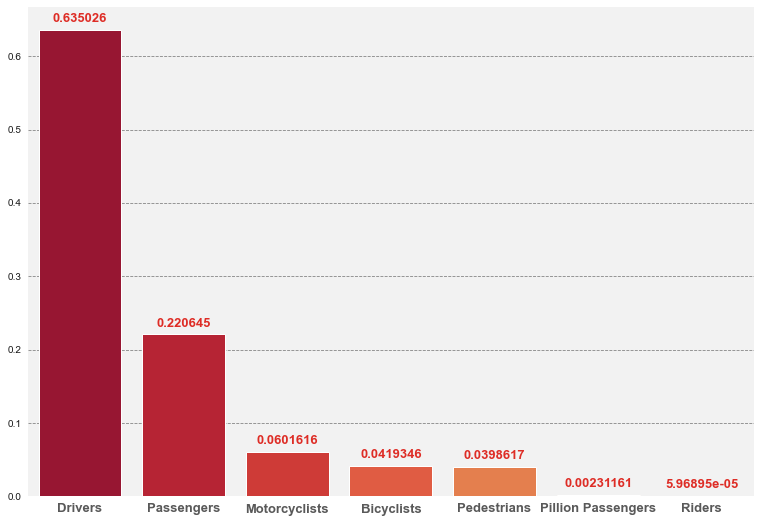

In [61]:
plt.figure(figsize=(13,9))
colour1 = sns.color_palette('YlOrRd_r', 10)
bar_user = df.road_user.value_counts(normalize=True)

bar_user1 = sns.barplot(x= bar_user.index, y=bar_user.values, palette=colour1)
sns.despine(left=True, bottom=True)
bar_user1.grid(axis='y')

bar_user1.bar_label(bar_user1.containers[0], fontsize=13, color='#de2d26', fontweight='bold', padding= 5)
_, xlabels = plt.xticks()
bar_user1.set_xticklabels(xlabels, fontsize=13, fontweight='bold', color='#595959')

plt.savefig('D:/OneDrive/Learning/Data Science/Python/Institute of Data/IOD_Coursework/Mini Project 01/Images/roaduser.png')
plt.show()